In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
house_data = pd.read_csv('./data/house_data.csv', low_memory=False)
house_data.head()

,URL,Adresse,Pris,Type,Energimærke,Ejerudgift,Boligydelse,Anvendelse,Boligtype,Enhedsareal,...,Boligenhed uden eget køkken,Matrikelnummer,Kommunal ejerlav navn,Grundstørrelse,Lands ejerlav kode,Vejareal,Lands ejerlav navn,Primær matrikel,Ejendomsnummer,Kommunal ejerlav kode
0,https://www.boliga.dk/bolig/1729667/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.boliga.dk/bolig/1729730/fiskeparke...,Fiskeparken 25 Snaptun 7130 Juelsminde,295000,Andelsbolig,C,NaN,6374,Fritliggende enfamiliehus,Egentlig beboelseslejlighed boligenhed med ege...,111,...,0.0,11be,ØSTRUP BY GLUD,9924.0,1100452.0,245.0,ØSTRUP BY GLUD,J,16078.0,NaN
2,https://www.boliga.dk/bolig/1729669/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.boliga.dk/bolig/1729668/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.boliga.dk/bolig/1729682/fermparken...,Fermparken 1B 8860 Ulstrup,195000,Andelsbolig,C,NaN,6104,Række kæde eller dobbelthus lodret adskillelse...,Egentlig beboelseslejlighed boligenhed med ege...,105,...,0.0,30u,VELLEV BY VELLE,14120.0,791455.0,0.0,VELLEV BY VELLEV,J,16026.0,NaN


In [4]:
house_data.describe()

,Etager,Udhus,Boligstørrelse tinglyst,Boligstørrelse,Boligenhed uden eget køkken,Grundstørrelse,Lands ejerlav kode,Vejareal,Ejendomsnummer
count,38324.000000,38323.000000,38323.000000,38323.000000,38321.000000,33460.000000,3.346000e+04,33460.000000,33460.000000
mean,4.936906,1.375179,82.219111,217.122120,52.021398,5139.035923,9.251338e+05,70.745637,90558.290974
std,674.782694,9.690958,829.985476,443.344163,175.244483,20387.251318,6.378347e+05,468.210148,160395.708376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.005100e+04,0.000000,1.000000
25%,1.000000,0.000000,0.000000,91.000000,0.000000,701.000000,4.111530e+05,0.000000,9577.500000
50%,1.000000,0.000000,0.000000,126.000000,0.000000,938.000000,8.101530e+05,0.000000,23104.000000
75%,1.000000,0.000000,0.000000,176.000000,0.000000,1577.000000,1.340162e+06,0.000000,103148.000000
max,132100.000000,628.000000,68695.000000,30093.000000,8974.000000,877028.000000,2.008761e+06,21433.000000,999529.000000


In [6]:
house_data.info()
house_data['Pris'] = pd.to_numeric(house_data['Pris'], errors='coerce')
house_data['Værelser'] = pd.to_numeric(house_data['Værelser'], errors='coerce')
house_data['Antal toiletter'] = pd.to_numeric(house_data['Antal toiletter'], errors='coerce')
house_data['Antal badeværelser'] = pd.to_numeric(house_data['Antal badeværelser'], errors='coerce')
house_data['Ejerudgift'] = pd.to_numeric(house_data['Ejerudgift'], errors='coerce')
house_data['Enhedsareal'] = pd.to_numeric(house_data['Enhedsareal'], errors='coerce')
house_data['Beboelsesareal'] = pd.to_numeric(house_data['Beboelsesareal'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38537 entries, 0 to 38536
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   URL                          38520 non-null  object 
 1   Adresse                      38515 non-null  object 
 2   Pris                         38461 non-null  float64
 3   Type                         38450 non-null  object 
 4   Energimærke                  32518 non-null  object 
 5   Ejerudgift                   37720 non-null  float64
 6   Boligydelse                  725 non-null    object 
 7   Anvendelse                   38348 non-null  object 
 8   Boligtype                    38342 non-null  object 
 9   Enhedsareal                  38338 non-null  float64
 10  Beboelsesareal               38326 non-null  float64
 11  Værelser                     38324 non-null  float64
 12  Antal toiletter              38327 non-null  float64
 13  Badeforhold     

In [4]:
data = house_data
data.drop(['Matrikelnummer',
           'Kommunal ejerlav navn',
           'Lands ejerlav kode',
           'Vejareal',
           'Lands ejerlav navn',
           'Primær matrikel',
           'Ejendomsnummer',
           'Kommunal ejerlav kode',
           'Varmeinstallation',
           'Afvigende etager',
           'Objekt status',
           'Anvendelse',
           'Boligtype',
           'Badeforhold',
           'Køkkenforhold',
           'Boligenhed med eget køkken',
           'Boligenhed uden eget køkken',
           'Energikode',
           'Toiletforhold',
           'Ydervæg',
           'Tag',
           'Boligydelse',
           'Bygningsnummer',
           'Boligstørrelse tinglyst'], 'columns', inplace=True)
data

,Pris,Type,Energimærke,Ejerudgift,Enhedsareal,Beboelsesareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligstørrelse BBR,Boligstørrelse,Grundstørrelse
0,295000.0,Andelsbolig,C,NaN,111.0,111.0,4.0,1.0,1.0,1.0,39.0,0.0,0.0,150.0,150.0,9924.0
1,175000.0,Andelsbolig,C,NaN,100.0,100.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,114.0,114.0,3808.0
2,195000.0,Andelsbolig,C,NaN,105.0,105.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,210.0,210.0,14120.0
3,395655.0,Andelsbolig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,395000.0,Villa,F,1146.0,110.0,110.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,68.0,68.0,575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38563,995000.0,Villa,D,1331.0,266.0,266.0,12.0,2.0,1.0,1.0,0.0,1999.0,0.0,166.0,166.0,196.0
38564,625000.0,Fritidshus,NaN,721.0,62.0,62.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,62.0,62.0,847.0
38565,895000.0,Fritidshus,NaN,995.0,80.0,80.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,80.0,80.0,4000.0
38566,490000.0,Villa,NaN,1586.0,155.0,155.0,7.0,1.0,1.0,1.0,0.0,0.0,0.0,107.0,107.0,26582.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38568 entries, 0 to 38567
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pris                38471 non-null  float64
 1   Type                38548 non-null  object 
 2   Energimærke         32617 non-null  object 
 3   Ejerudgift          37790 non-null  float64
 4   Enhedsareal         38398 non-null  float64
 5   Beboelsesareal      38394 non-null  float64
 6   Værelser            38402 non-null  float64
 7   Antal toiletter     38389 non-null  float64
 8   Antal badeværelser  38393 non-null  float64
 9   Etager              38388 non-null  float64
 10  Carport             38388 non-null  float64
 11  Seneste ombygning   38388 non-null  float64
 12  Udhus               38388 non-null  float64
 13  Boligstørrelse BBR  38388 non-null  float64
 14  Boligstørrelse      38388 non-null  float64
 15  Grundstørrelse      33500 non-null  float64
dtypes: f

In [6]:
villa_data = data[data['Type'] == 'Villa']

In [7]:
# Find missing values in the data and drop those rows:
print('rows before drop n/a',len(villa_data))
bool_matrix = villa_data.isnull() # dataframe with True and False values for each cell in the villa_data
only_null_filter = bool_matrix.any(axis=1) # is there a True value in any column in each row. returns a pandas Series with index matching index of villa dataframe
missing = villa_data[only_null_filter] # show all rows that has one or more null values
villa_data = villa_data.dropna()
print('rows after',len(villa_data))
#pd.options.display.max_rows = None # let me see all rows in the dataframe (can be used with columns too)
#villa_data
#bool_matrix

rows before drop n/a 23779
rows after 23215


In [8]:
villa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23215 entries, 4 to 38563
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pris                23215 non-null  float64
 1   Type                23215 non-null  object 
 2   Energimærke         23215 non-null  object 
 3   Ejerudgift          23215 non-null  float64
 4   Enhedsareal         23215 non-null  float64
 5   Beboelsesareal      23215 non-null  float64
 6   Værelser            23215 non-null  float64
 7   Antal toiletter     23215 non-null  float64
 8   Antal badeværelser  23215 non-null  float64
 9   Etager              23215 non-null  float64
 10  Carport             23215 non-null  float64
 11  Seneste ombygning   23215 non-null  float64
 12  Udhus               23215 non-null  float64
 13  Boligstørrelse BBR  23215 non-null  float64
 14  Boligstørrelse      23215 non-null  float64
 15  Grundstørrelse      23215 non-null  float64
dtypes: f

In [9]:
villa_data.columns

Index(['Pris', 'Type', 'Energimærke', 'Ejerudgift', 'Enhedsareal',
       'Beboelsesareal', 'Værelser', 'Antal toiletter', 'Antal badeværelser',
       'Etager', 'Carport', 'Seneste ombygning', 'Udhus', 'Boligstørrelse BBR',
       'Boligstørrelse', 'Grundstørrelse'],
      dtype='object')

In [10]:
villa_data.describe()

,Pris,Ejerudgift,Enhedsareal,Beboelsesareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligstørrelse BBR,Boligstørrelse,Grundstørrelse
count,2.321500e+04,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000,23215.000000
mean,2.279545e+06,2461.182511,161.795692,156.968038,5.095197,1.657334,1.359897,1.033384,1.353608,881.039888,1.527848,137.746759,134.789662,2106.614043
std,2.324485e+06,1690.368241,68.742942,58.617842,1.794682,0.687777,0.585134,0.187156,7.164976,987.415796,10.019366,66.453513,62.112667,7762.320476
min,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025000e+06,1610.000000,123.000000,122.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,97.000000,96.000000,700.000000
50%,1.695000e+06,2094.000000,152.000000,150.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,128.000000,125.000000,870.000000
75%,2.750000e+06,2783.500000,187.000000,184.000000,6.000000,2.000000,2.000000,1.000000,0.000000,1983.000000,0.000000,164.000000,161.000000,1198.000000
max,5.950000e+07,62140.000000,2764.000000,1442.000000,46.000000,19.000000,9.000000,4.000000,140.000000,2020.000000,282.000000,2764.000000,2764.000000,308376.000000


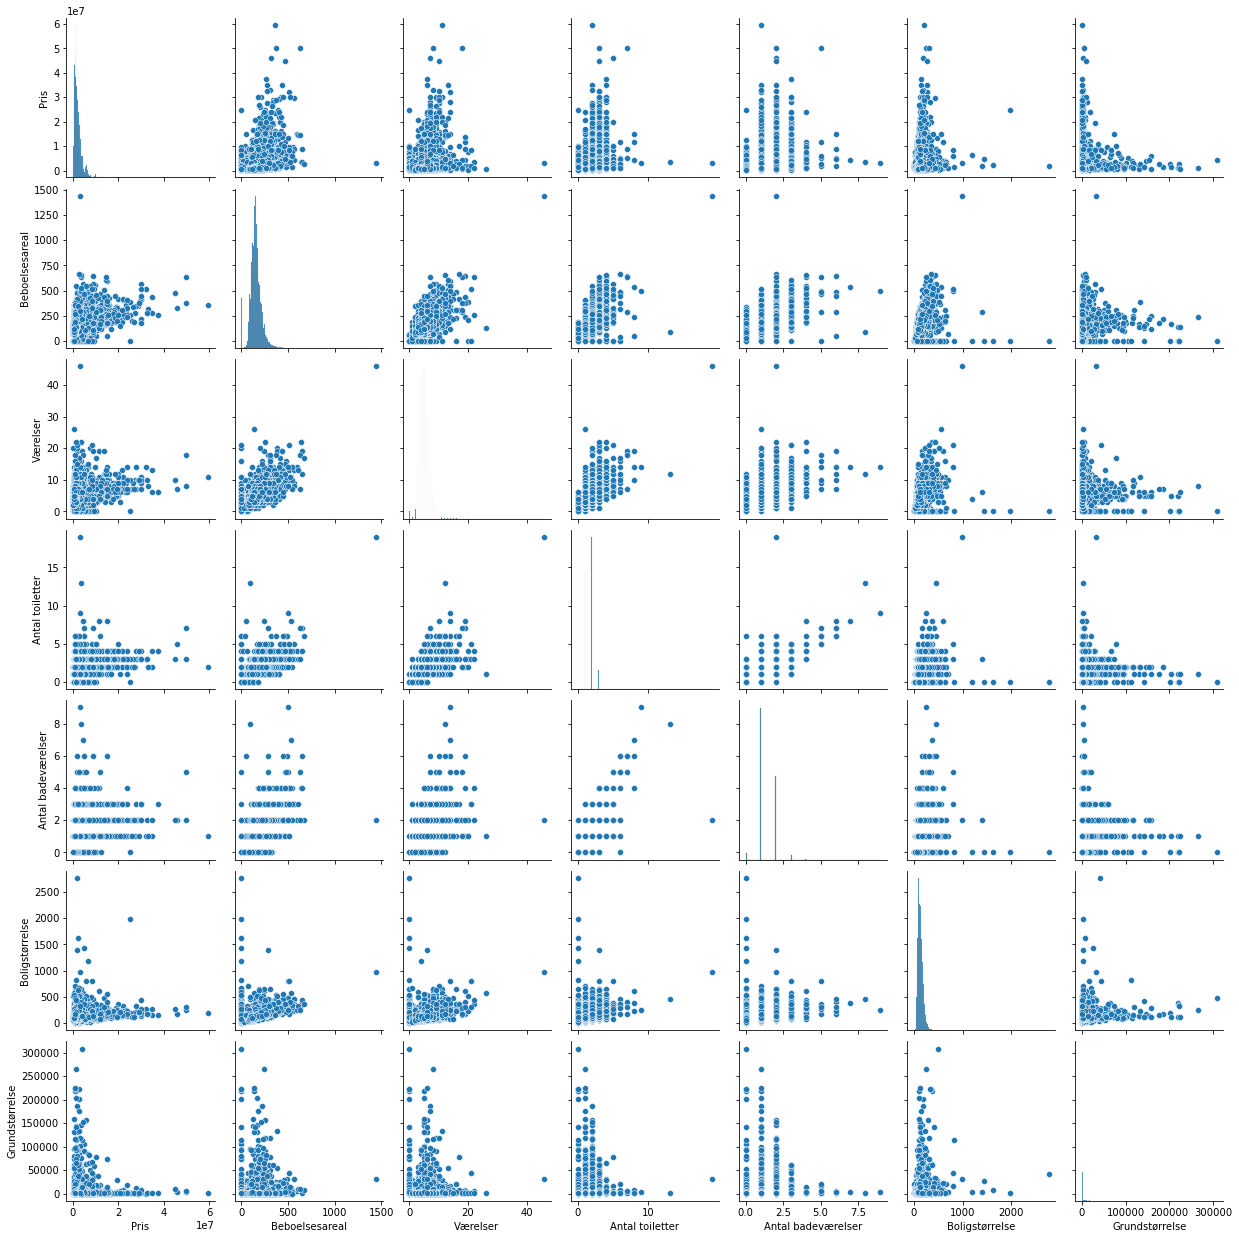

In [11]:
sb.pairplot(villa_data, vars=['Pris', 'Beboelsesareal', 'Værelser', 'Antal toiletter', 'Antal badeværelser', 'Boligstørrelse', 'Grundstørrelse'])

<AxesSubplot:>

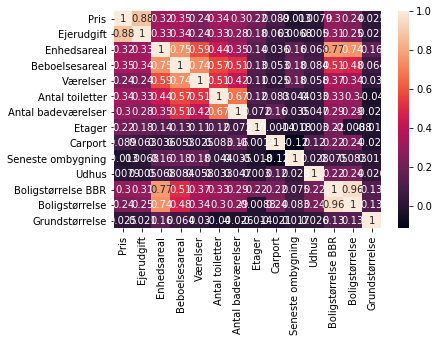

In [12]:
sb.heatmap(villa_data.corr(), annot=True)

In [39]:
test = villa_data[villa_data['Antal toiletter'] > 9]
#est = villa_data[villa_data['Værelser'] > 15]
test

,Pris,Type,Energimærke,Ejerudgift,Enhedsareal,Beboelsesareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligstørrelse BBR,Boligstørrelse,Grundstørrelse
34552,3695000.0,Villa,E,2335.0,559.0,88.0,12.0,13.0,8.0,1.0,0.0,1980.0,0.0,460.0,460.0,2008.0
34815,3195000.0,Villa,D,8174.0,1900.0,1442.0,46.0,19.0,2.0,2.0,0.0,1971.0,0.0,1721.0,979.0,31375.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = villa_data[['Ejerudgift', 'Enhedsareal',
       'Beboelsesareal','Antal toiletter', 'Antal badeværelser',
       'Etager', 'Carport', 'Boligstørrelse BBR', 'Grundstørrelse']]
y = villa_data['Pris']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [14]:
coeff_df

,Coefficient
Ejerudgift,1186.827884
Enhedsareal,229.888102
Beboelsesareal,1318.509975
Antal toiletter,57794.787051
Antal badeværelser,104122.911915
Etager,766282.881832
Carport,9114.335900
Boligstørrelse BBR,-466.245456
Grundstørrelse,3.342231


In [15]:
predictions = lm.predict(X_test)

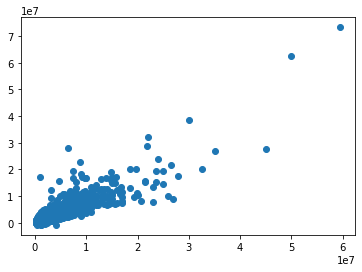

In [16]:
plt.scatter(y_test, predictions)

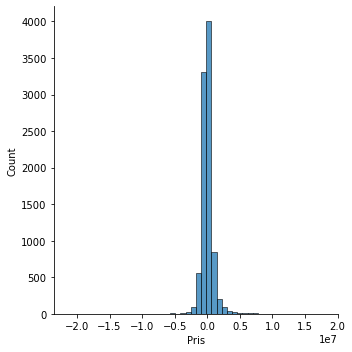

In [21]:
sb.displot((y_test-predictions), bins=50)